### 1.Importing Librarires

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split


### 2. Importing dataset

In [2]:
startup = pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 3.Data Understanding

In [3]:
startup.shape

(50, 5)

In [4]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [7]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
startup.kurtosis()

R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

In [9]:
startup.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

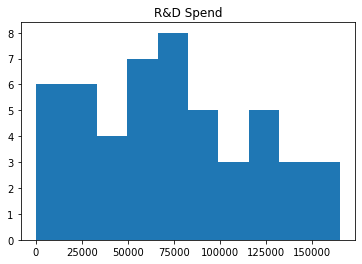

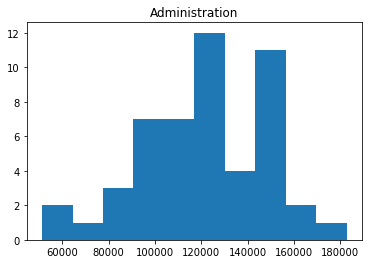

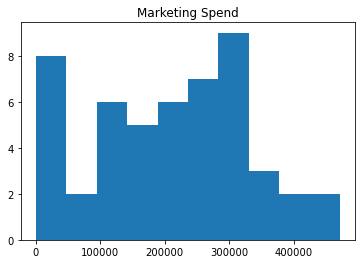

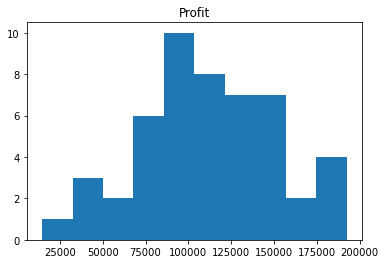

In [10]:
#Histogram
plt.title('R&D Spend')
plt.hist(x='R&D Spend',data=startup)
plt.show()
plt.title('Administration')
plt.hist(x='Administration',data=startup)
plt.show()
plt.title('Marketing Spend')
plt.hist(x='Marketing Spend',data=startup)
plt.show()
plt.title('Profit')
plt.hist(x='Profit',data=startup)
plt.show()

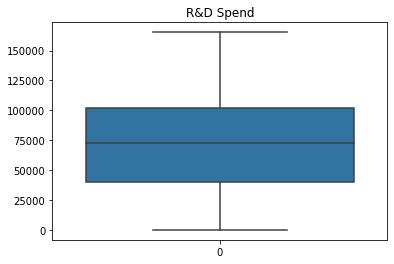

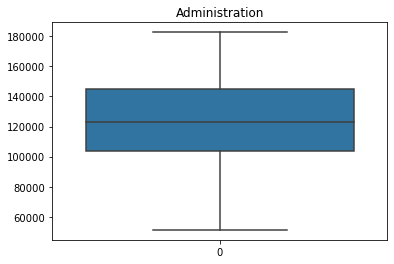

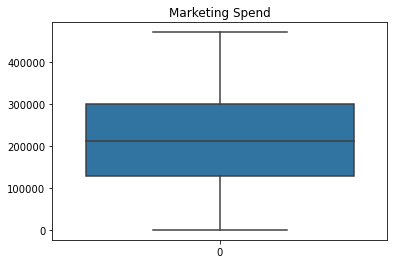

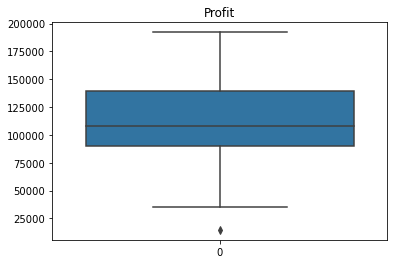

In [11]:
#Boxplot To Find the outliers
plt.title('R&D Spend')
sns.boxplot(data=startup['R&D Spend'])
plt.show()
plt.title('Administration')
sns.boxplot(data=startup['Administration'])
plt.show()
plt.title('Marketing Spend')
sns.boxplot(data=startup['Marketing Spend'])
plt.show()
plt.title('Profit')
sns.boxplot(data=startup['Profit'])
plt.show()

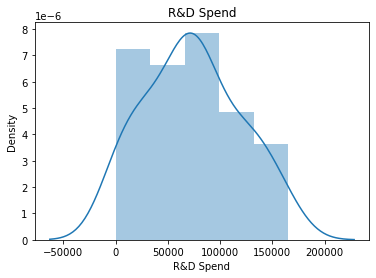

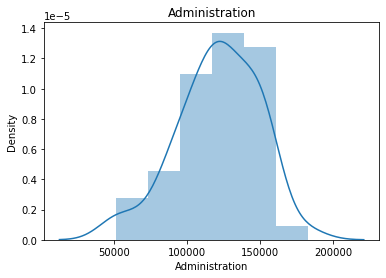

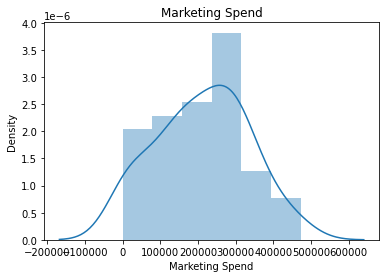

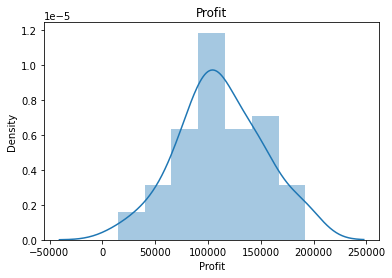

In [12]:
#Distplot
plt.title('R&D Spend')
sns.distplot(startup['R&D Spend'])
plt.show()
plt.title('Administration')
sns.distplot(startup['Administration'])
plt.show()
plt.title('Marketing Spend')
sns.distplot(startup['Marketing Spend'])
plt.show()
plt.title('Profit')
sns.distplot(startup['Profit'])
plt.show()

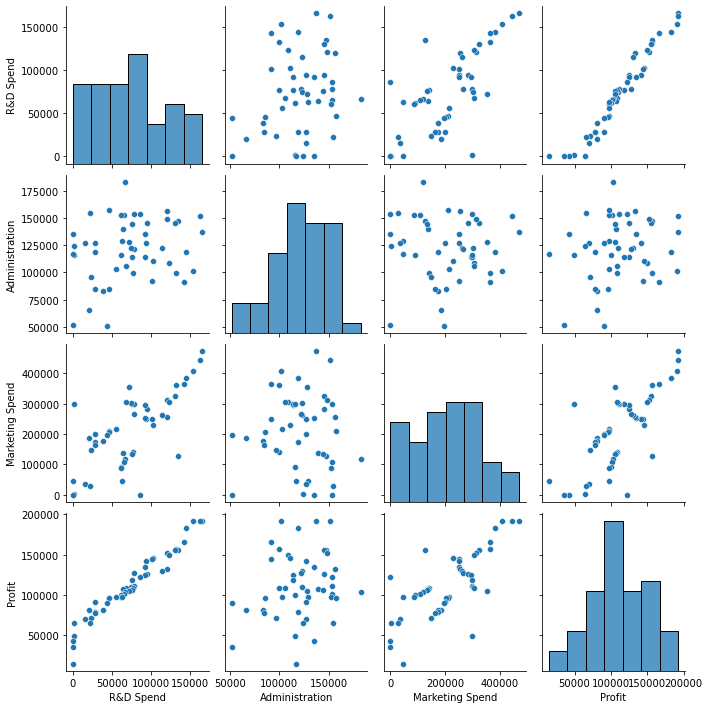

In [13]:
sns.pairplot(startup)
plt.show()

## 3[b].Checking the Assumptions

## 1.To check the linear association with two feature

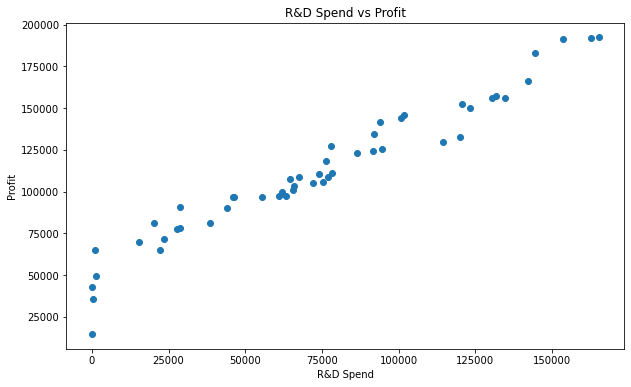

In [14]:
plt.figure(figsize=(10,6))
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend',)
plt.ylabel('Profit')
plt.scatter(x= 'R&D Spend',y= 'Profit',data=startup)
plt.show()

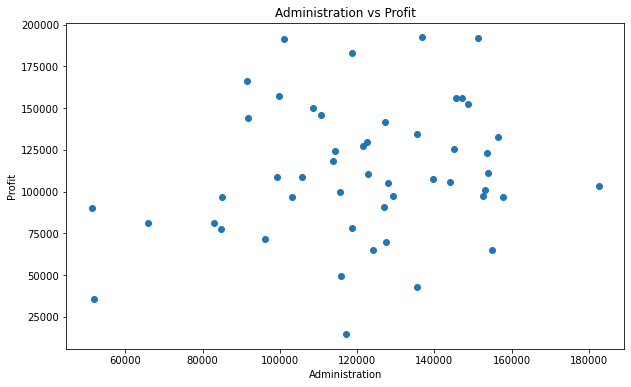

In [15]:
plt.figure(figsize=(10,6))
plt.title('Administration vs Profit')
plt.xlabel('Administration',)
plt.ylabel('Profit')
plt.scatter(x= 'Administration',y= 'Profit',data=startup)
plt.show()

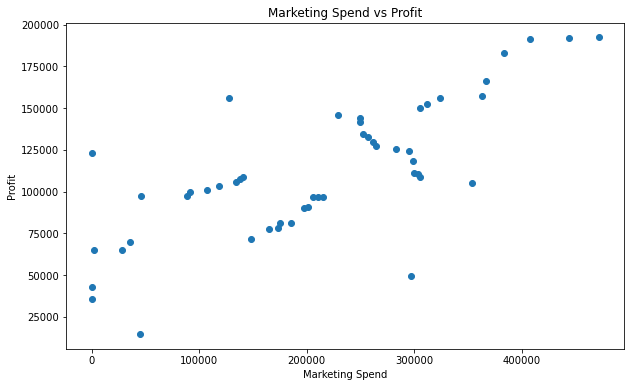

In [16]:
plt.figure(figsize=(10,6))
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend',)
plt.ylabel('Profit')
plt.scatter(x= 'Marketing Spend',y= 'Profit',data=startup)
plt.show()

In [17]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


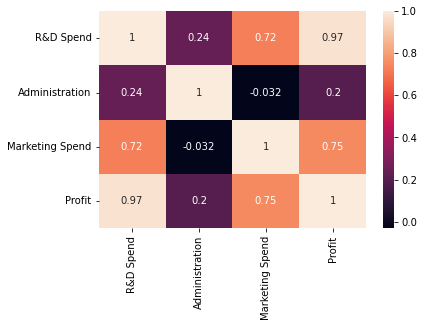

In [18]:
sns.heatmap(startup.corr(),annot=True)
plt.show()

## 4.Data Preparation

In [19]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
startup = startup.rename(columns={'R&D Spend':'RDS','Administration':'ADS','Marketing Spend':'MS'})
startup.head()

,RDS,ADS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
X = startup.drop(labels=['State','Profit'],axis=1)
X.head()

,RDS,ADS,MS
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [22]:
y = startup[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## 5.Model Building || Model Training

In [66]:
startup.head()

,RDS,ADS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# MODEL-1 OLS Method

In [24]:
linear_model_1 = smf.ols(formula='Profit~RDS+ADS+MS',data=startup).fit()
linear_model_1

## MODEL TESTING

In [25]:
#Finding Co-efficients
linear_model_1.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MS               0.027228
dtype: float64

In [26]:
#Finding tvalues and Pvalues
linear_model_1.tvalues,linear_model_1.pvalues

(Intercept     7.626218
 RDS          17.846374
 ADS          -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RDS          2.634968e-22
 ADS          6.017551e-01
 MS           1.047168e-01
 dtype: float64)

In [27]:
#Finding Rsquared values
linear_model_1.rsquared,linear_model_1.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [28]:
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        13:45:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADS           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
linear_model_1.predict(X).head()

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

### Model Validation

### Two Techniques: 1. Collinearity Check & 2. Residual Analysis

### 1) Collinearity Problem Check

###  Calculate VIF = 1/(1-Rsquare) for all independent variables

* Multicollinearity can be detected via various methods. In this article, we will focus on the most common one – VIF (Variable Inflation Factors).

* ” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “

In [30]:

rsq_rds=smf.ols("RDS~ADS+MS",data=startup).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_ads=smf.ols("ADS~RDS+MS",data=startup).fit().rsquared
vif_ads=1/(1-rsq_ads)

rsq_ms=smf.ols("MS~RDS+ADS",data=startup).fit().rsquared
vif_ms=1/(1-rsq_ms)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_rds,vif_ads,vif_ms]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


 ## NO VIF is not greater than 10.Hence No Collinearity, so consider all varaibles in Regression equation

### 2) Residual Analysis
### Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

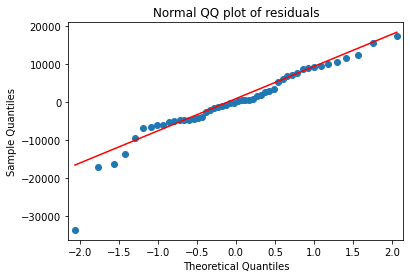

In [31]:
#Test for normality of residual(qqplot)
qqplot= sm.qqplot(linear_model_1.resid,line='q')
plt.title('Normal QQ plot of residuals')
plt.show()

In [32]:
list(np.where(linear_model_1.resid<-30000))

[array([49], dtype=int64)]

In [33]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) :
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

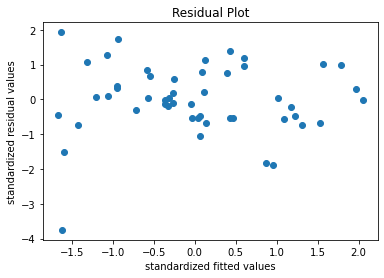

In [34]:
plt.scatter(standard_values(linear_model_1.fittedvalues),standard_values(linear_model_1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [35]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


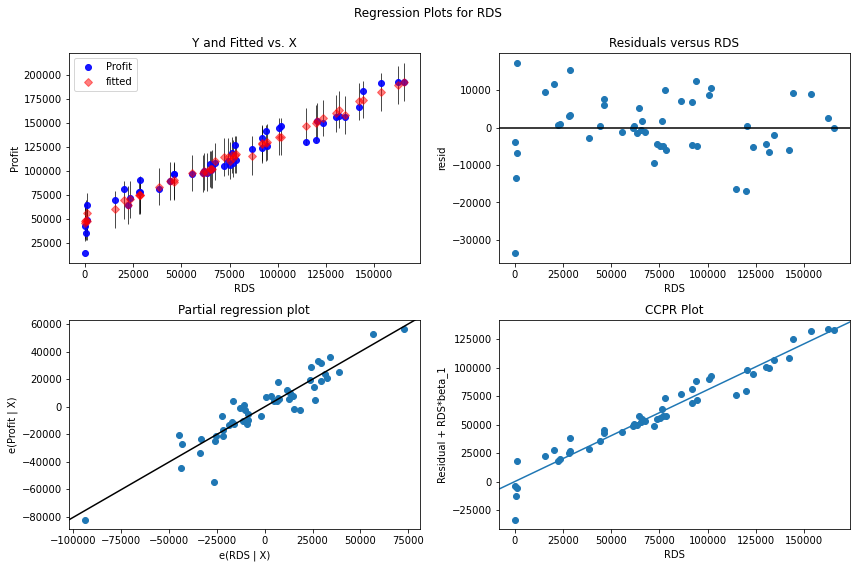

In [36]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'RDS',fig=fig)
plt.show()

eval_env: 1


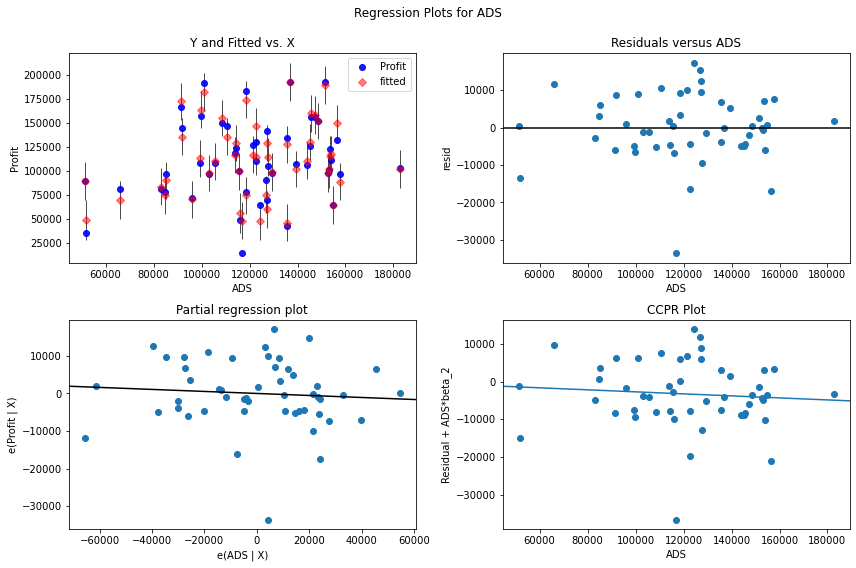

In [37]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'ADS',fig=fig)
plt.show()

eval_env: 1


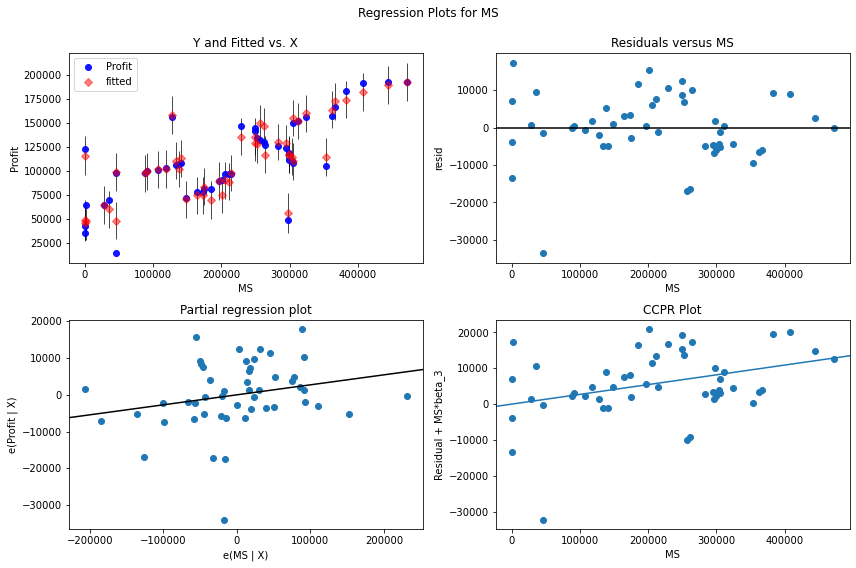

In [38]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'MS',fig=fig)
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)

### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [39]:
#cooks distance to find outliers
model_influence = linear_model_1.get_influence()
(c, _) = model_influence.cooks_distance

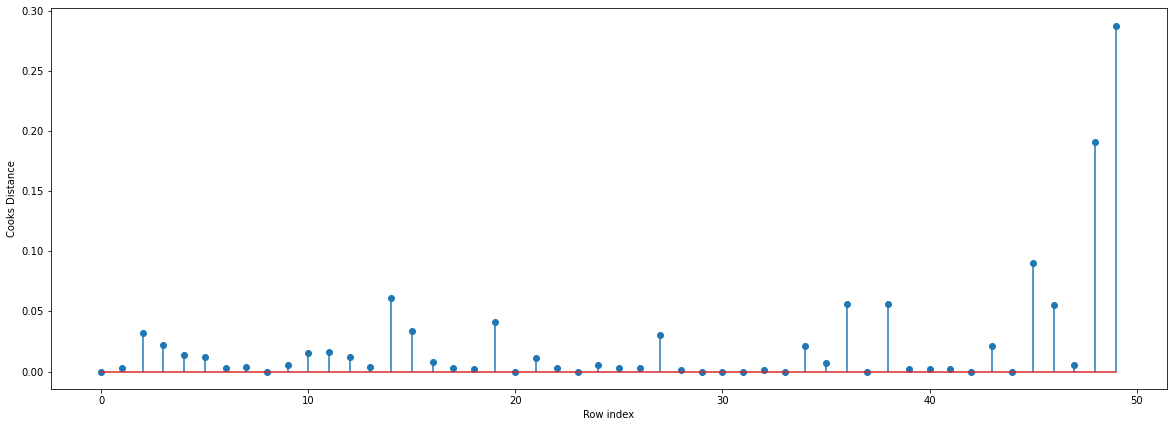

In [40]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

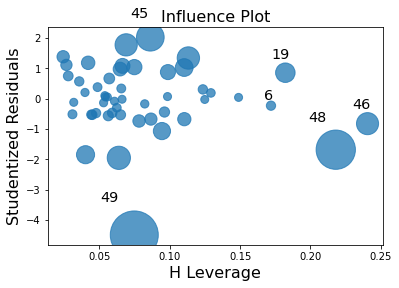

In [42]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(linear_model_1)
plt.show()

In [43]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [44]:
startup[startup.index.isin([49])]

,RDS,ADS,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model-1

In [45]:
startup1 = startup.drop(index=49,axis=0)
startup1.tail()

,RDS,ADS,MS,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [46]:
linear_model_2 = smf.ols(formula='Profit~RDS+ADS+MS',data=startup1).fit()
linear_model_2

## MODEL TESTING

In [47]:
#Finding Co-efficients
linear_model_2.params

Intercept    52382.439251
RDS              0.783002
ADS             -0.022201
MS               0.025234
dtype: float64

In [48]:
#Finding tvalues and Pvalues
linear_model_2.tvalues,linear_model_2.pvalues

(Intercept     9.450782
 RDS          20.469501
 ADS          -0.517889
 MS            1.825383
 dtype: float64,
 Intercept    2.960000e-12
 RDS          1.971077e-24
 ADS          6.070728e-01
 MS           7.458443e-02
 dtype: float64)

In [49]:
#Finding Rsquared values
linear_model_2.rsquared,linear_model_2.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [50]:
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           8.85e-32
Time:                        13:45:06   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADS           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
linear_model_2.predict(startup1).tail()

44    67025.731107
45    50457.297206
46    58338.443625
47    49375.776655
48    51658.096812
dtype: float64

### Model-3

In [67]:
X.head()

,RDS,ADS,MS
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [68]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [55]:
#Training data
X_train.shape,y_train.shape

((40, 3), (40, 1))

In [56]:
#Test data
X_test.shape,y_test.shape

((10, 3), (10, 1))

In [58]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
linear_model_3 = smf.OLS(endog = y_train, exog = X_train).fit()

In [59]:
#Finding Co-efficients
linear_model_3.params

RDS    0.697656
ADS    0.351614
MS     0.071751
dtype: float64

In [60]:
#Finding tvalues and Pvalues
linear_model_3.tvalues,linear_model_3.pvalues

(RDS    10.551154
 ADS    10.864909
 MS      3.175498
 dtype: float64,
 RDS    1.041721e-12
 ADS    4.559127e-13
 MS     3.012080e-03
 dtype: float64)

In [61]:
#Finding Rsquared values
linear_model_3.rsquared,linear_model_3.rsquared_adj

(0.9890562958593851, 0.9881689684966326)

In [62]:
linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1115.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    2.61e-36
Time:                        13:45:33   Log-Likelihood:                         -433.15
No. Observations:                  40   AIC:                                      872.3
Df Residuals:                      37   BIC:                                      877.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RDS            0.6977      0.066     10.551      0.000       0.564       0.832
ADS            0.3516      0.032     10.865      0.000       0.286       0.417
MS             0.0718      0.023      3.175      0.003       0.026       0.118
==============================================================================
Omnibus:                        1.466   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.028
Skew:                          -0.393   Prob(JB):                        0.598
Kurtosis:                       2.989   Cond. No.                         9.44
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R-Square value Tables from above models

In [65]:
value = {'Model':['linear_model_1' ,'linear_model_2' ,'linear_model_3'],'R-Squared Values':[linear_model_1.rsquared,linear_model_2.rsquared,linear_model_3.rsquared]}
value = pd.DataFrame(value)
value

,Model,R-Squared Values
0,linear_model_1,0.950746
1,linear_model_2,0.961316
2,linear_model_3,0.989056
